In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from kernels_class import *
from rbf_kernel import *
import seaborn as sns

In [2]:
n_source_plus = 500
n_source_minus = 400

n_target = 300

pi_target = 0.4

r =(1/n_source_plus + 1/n_source_minus + 1/n_target)

In [3]:
var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.array([0,0,0]), np.eye(3), np.array([2,1,-1]), 
                                                      np.array([[1,0.5,0],[0.5, 1, 0.5],[0,0.5,1]]), pi_target, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(0.8)**2))

In [4]:
delta = np.linspace(0.01, 20, 100)
res = np.zeros((4, 100))

In [5]:
for i in range(100):
    var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.array([0,0,0]), np.eye(3), np.array([2,1,-1]), 
                                                      np.array([[1,0.5,0],[0.5, 1, 0.5],[0,0.5,1]]), pi_target, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[i])**2))
    res[0, i] = var_est

    var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.array([0,0,0]), np.eye(3), np.array([2,1,-1]), 
                                                      np.eye(3), pi_target, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[i])**2))
    res[1, i] = var_est

    var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.array([0,0,0]), np.eye(3), np.array([2,1,0]), 
                                                      np.eye(3), 0.1, 
                 3/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[i])**2))
    res[2, i] = var_est

    var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.array([0,0,0]), np.eye(3), np.array([2,1,0]), 
                                                      np.eye(3), 0.9, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[i])**2))
    res[3, i] = var_est

In [6]:
res[2,:]

array([0.67343439, 0.65269354, 0.60371808, 0.54508137, 0.49139667,
       0.44907912, 0.4187361 , 0.39844571, 0.38573696, 0.37841232,
       0.3747645 , 0.37355191, 0.37390455, 0.37522695, 0.37711836,
       0.37931305, 0.38163745, 0.38398043, 0.38627271, 0.38847295,
       0.39055826, 0.39251781, 0.39434857, 0.39605236, 0.39763399,
       0.39909994, 0.40045754, 0.40171441, 0.40287814, 0.40395605,
       0.40495506, 0.40588167, 0.40674188, 0.40754123, 0.40828479,
       0.40897722, 0.40962273, 0.41022518, 0.41078808, 0.41131461,
       0.41180767, 0.41226989, 0.41270368, 0.41311123, 0.41349451,
       0.41385535, 0.4141954 , 0.41451618, 0.41481906, 0.41510532,
       0.41537612, 0.41563251, 0.41587548, 0.41610592, 0.41632466,
       0.41653246, 0.41673003, 0.416918  , 0.41709699, 0.41726754,
       0.41743016, 0.41758533, 0.4177335 , 0.41787506, 0.4180104 ,
       0.41813988, 0.41826382, 0.41838253, 0.41849629, 0.41860538,
       0.41871004, 0.41881051, 0.418907  , 0.41899972, 0.41908

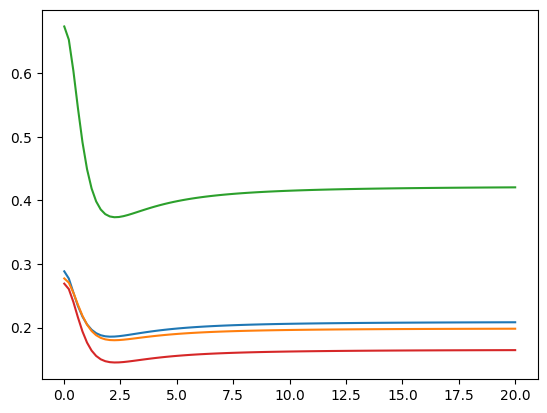

In [7]:
plt.plot(delta, res.T)

In [8]:
np.argmin(res, axis=1)

array([10, 11, 11, 11])

In [9]:
def generate_sample_fig3(scale):
    n_source_plus = int(500*scale)
    n_source_minus = int(400*scale)
    n_source = n_source_plus + n_source_minus
    pi_source = n_source_plus/n_source

    n_target_plus = int(300*0.4*scale)
    n_target_minus = int(300*0.6*scale)
    n_target = n_target_plus + n_target_minus
    pi_target = n_target_plus/n_target

    p_source_plus = np.random.multivariate_normal(mean=np.array([0,0,0]), cov=np.eye(3), size=(n_source_plus))
    p_source_minus = np.random.multivariate_normal(mean=np.array([2,1,-1]), cov=np.array([[1,0.5,0],[0.5, 1, 0.5],[0,0.5,1]]), size=(n_source_minus))

    p_target_plus = np.random.multivariate_normal(mean=np.array([0,0,0]), cov=np.eye(3), size=(n_target_plus))
    p_target_minus = np.random.multivariate_normal(mean=np.array([2,1,-1]), cov=np.array([[1,0.5,0],[0.5, 1, 0.5],[0,0.5,1]]), size=(n_target_minus))

    p_target = np.vstack((p_target_plus, p_target_minus))

    return p_source_plus, p_source_minus, p_target

In [12]:
N = 100
n2 = 50

In [13]:
res_nmr = np.zeros((N, n2))
res_ipr = np.zeros((N, n2))
res_var_plug_in = np.zeros((N, n2))
res_var_explicit = np.zeros((N, n2))

res_estim_nmr = np.zeros((N, n2))
res_estim_ipr = np.zeros((N, n2))

delta = np.linspace(0.8, 4, n2)

for i in tqdm(range(N)):

    p_source_plus, p_source_minus, p_target = generate_sample_fig3(1)

    for j in range(n2):
        
        est_tmp = estimator_RHKS(p_target, p_source_plus, p_source_minus, kernel_params={'gamma': 1/(2*(delta[j]**2))})
        est_tmp.estimate_pi_nrm()
        est_tmp.estimate_pi_ipr()

        res_nmr[i,j] = est_tmp.pi_nrm
        res_ipr[i,j] = est_tmp.pi_ipr

        est_tmp.compute_K2()
        est_tmp.compute_tau_plug_in()
        est_tmp.compute_tau_explicit()

        est_tmp.estimate_variance_explicit()
        est_tmp.estimate_variance_plug_in()

        res_var_plug_in[i,j] = est_tmp.var_plug_in

        res_var_explicit[i,j] = est_tmp.var_explicit

        var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.mean(p_source_plus, 0), np.cov(p_source_plus.T), 
                                                              np.mean(p_source_minus, 0), np.cov(p_source_plus.T), est_tmp.pi_nrm, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[j])**2))

        res_estim_nmr[i,j] = var_est

        var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.mean(p_source_plus, 0), np.cov(p_source_plus.T), 
                                                              np.mean(p_source_minus, 0), np.cov(p_source_plus.T), est_tmp.pi_ipr, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[j])**2))
        res_estim_ipr[i,j] = var_est

        # est_tmp.compute_K2()
        # est_tmp.compute_sigmas2_nrm_2()
        # est_tmp.compute_variance_nrm_2()
        # res_nmr_var2[i] = est_tmp.var_nrm_2

100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


In [14]:
n_source_plus = 500
n_source_minus = 400

n_target = 300

pi_target = 0.4

denominator = np.sqrt(1/n_source_plus + 1/n_source_minus + 1/n_target)
r =(1/n_source_plus + 1/n_source_minus + 1/n_target)

In [15]:
res = np.zeros(n2)

In [16]:
for i in range(n2):
    var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.array([0,0,0]), np.eye(3), np.array([2,1,-1]), 
                                                      np.array([[1,0.5,0],[0.5, 1, 0.5],[0,0.5,1]]), pi_target, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[i])**2))
    res[i] = var_est

In [17]:
# plt.plot(delta, res_var_plug_in.T)
# plt.plot(delta, res, c='black')
# plt.show()

In [18]:
# plt.plot(delta, res_var_explicit.T)
# plt.plot(delta, res, c='black')
# plt.show()

/tmp/ipykernel_90627/3605009374.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_var_explicit).set_xticklabels(np.round(delta,1))


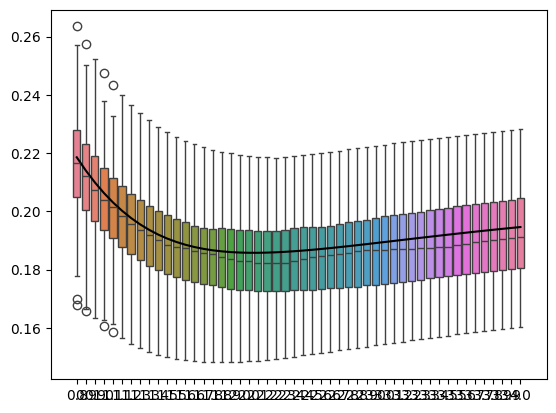

In [19]:
sns.boxplot(res_var_explicit).set_xticklabels(np.round(delta,1))
plt.plot(res, c='black')
plt.show()

/tmp/ipykernel_90627/2137694640.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_var_plug_in).set_xticklabels(np.round(delta,1))


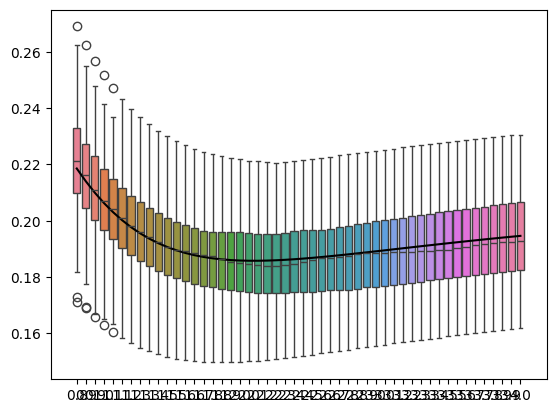

In [20]:
sns.boxplot(res_var_plug_in).set_xticklabels(np.round(delta,1))
plt.plot(res, c='black')
plt.show()

/tmp/ipykernel_90627/61365166.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_nmr).set_xticklabels(np.round(delta,1))


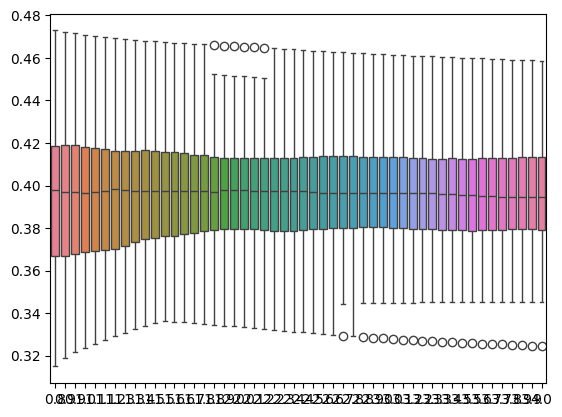

In [33]:
sns.boxplot(res_nmr).set_xticklabels(np.round(delta,1))
plt.show()

/tmp/ipykernel_90627/1878639219.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_ipr).set_xticklabels(np.round(delta,1))


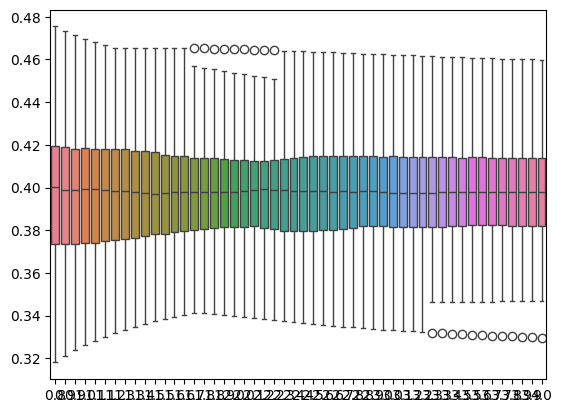

In [34]:
sns.boxplot(res_ipr).set_xticklabels(np.round(delta,1))
plt.show()

/tmp/ipykernel_90627/2330987937.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_var_plug_in).set_xticklabels(np.round(delta,1))
/tmp/ipykernel_90627/2330987937.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_estim_nmr, color='gray').set_xticklabels(np.round(delta,1))


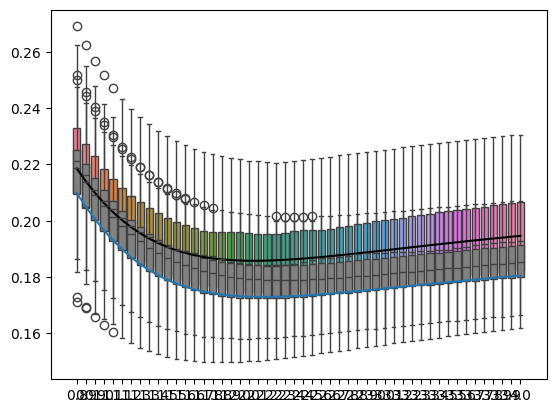

In [31]:
sns.boxplot(res_var_plug_in).set_xticklabels(np.round(delta,1))
sns.boxplot(res_estim_nmr, color='gray').set_xticklabels(np.round(delta,1))
plt.plot(res_estim_nmr[0,:])
plt.plot(res, c='black')

In [28]:
np.argmin(res_estim_nmr, 0)

array([83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83,
       83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83,
       83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83])

In [30]:
np.argmin(res)

np.int64(20)

In [35]:
denominator

np.float64(0.08850612031567837)

In [55]:
c = 1.96

In [56]:
lower_ipr = res_ipr - c*np.sqrt(res_var_explicit)*denominator
upper_ipr = res_ipr + c*np.sqrt(res_var_explicit)*denominator

In [ ]:
np.mean((0.4 > lower_ipr) & (0.4< upper_ipr), 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [82]:
def generate_sample(scale):
    n_source_plus = int(500*scale)
    n_source_minus = int(400*scale)
    n_source = n_source_plus + n_source_minus
    pi_source = n_source_plus/n_source

    # n_target_plus = int(300*0.4*scale)
    # n_target_minus = int(300*0.6*scale)
    # n_target = n_target_plus + n_target_minus
    # pi_target = n_target_plus/n_target

    n_target_plus = np.sum(np.random.binomial(n=1, p=0.4, size=300))
    n_target_minus = 300 - n_target_plus
    n_target = n_target_plus + n_target_minus
    pi_target = 0.4#n_target_plus/n_target

    p_source_plus = np.random.multivariate_normal(mean=np.zeros(10), cov=np.eye(10), size=(n_source_plus))
    p_source_minus = np.random.multivariate_normal(mean=0.5*np.ones(10), cov=np.eye(10), size=(n_source_minus))

    p_target_plus = np.random.multivariate_normal(mean=np.zeros(10), cov=np.eye(10), size=(n_target_plus))
    p_target_minus = np.random.multivariate_normal(mean=0.5*np.ones(10), cov=np.eye(10), size=(n_target_minus))

    p_target = np.vstack((p_target_plus, p_target_minus))

    return p_source_plus, p_source_minus, p_target

In [83]:
N = 50
n2 = 50

In [84]:
res_nmr = np.zeros((N, n2))
res_ipr = np.zeros((N, n2))
res_var_plug_in = np.zeros((N, n2))
res_var_explicit = np.zeros((N, n2))

res_estim_nmr = np.zeros((N, n2))
res_estim_ipr = np.zeros((N, n2))

delta = np.linspace(0.05, 5, n2)

for i in tqdm(range(N)):

    p_source_plus, p_source_minus, p_target = generate_sample_fig3(1)

    for j in range(n2):
        
        est_tmp = estimator_RHKS(p_target, p_source_plus, p_source_minus, kernel_params={'gamma': 1/(2*(delta[j]**2))})
        est_tmp.estimate_pi_nrm()
        est_tmp.estimate_pi_ipr()

        res_nmr[i,j] = est_tmp.pi_nrm
        res_ipr[i,j] = est_tmp.pi_ipr

        est_tmp.compute_K2()
        est_tmp.compute_tau_plug_in()
        est_tmp.compute_tau_explicit()

        est_tmp.estimate_variance_explicit()
        est_tmp.estimate_variance_plug_in()

        res_var_plug_in[i,j] = est_tmp.var_plug_in

        res_var_explicit[i,j] = est_tmp.var_explicit

        var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.mean(p_source_plus, 0), np.cov(p_source_plus.T), 
                                                              np.mean(p_source_minus, 0), np.cov(p_source_plus.T), est_tmp.pi_nrm, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[j])**2))

        res_estim_nmr[i,j] = var_est

        var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.mean(p_source_plus, 0), np.cov(p_source_plus.T), 
                                                              np.mean(p_source_minus, 0), np.cov(p_source_plus.T), est_tmp.pi_ipr, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[j])**2))
        res_estim_ipr[i,j] = var_est

        # est_tmp.compute_K2()
        # est_tmp.compute_sigmas2_nrm_2()
        # est_tmp.compute_variance_nrm_2()
        # res_nmr_var2[i] = est_tmp.var_nrm_2

100%|██████████| 50/50 [01:09<00:00,  1.40s/it]


In [85]:
n_source_plus = 500
n_source_minus = 400

n_target = 300

pi_target = 0.4

denominator = np.sqrt(1/n_source_plus + 1/n_source_minus + 1/n_target)
r =(1/n_source_plus + 1/n_source_minus + 1/n_target)

In [86]:
res = np.zeros(n2)

In [87]:
for i in range(n2):
    var_est, tar_est, pos_est, neg_est = variance_for_rbf(np.array([0,0,0]), np.eye(3), np.array([2,1,-1]), 
                                                      np.array([[1,0.5,0],[0.5, 1, 0.5],[0,0.5,1]]), pi_target, 
                 1/(r*n_target),1/(r*n_source_plus),1/(r*n_source_minus), gamma=1/(2*(delta[i])**2))
    res[i] = var_est

/tmp/ipykernel_90627/1167799355.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_var_explicit[:,1:]).set_xticklabels(np.round(delta[1:],1))


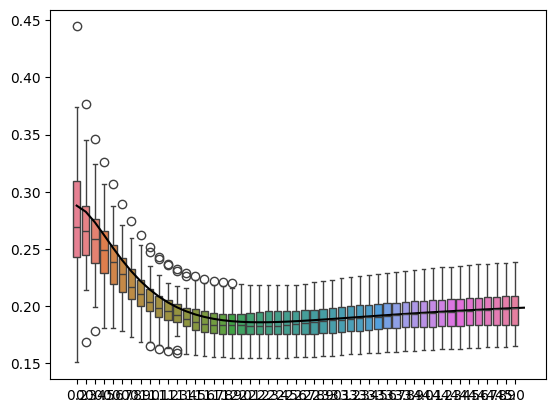

In [96]:
sns.boxplot(res_var_explicit[:,1:]).set_xticklabels(np.round(delta[1:],1))
plt.plot(res, c='black')
plt.show()

/tmp/ipykernel_90627/3764677851.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_var_plug_in[:,1:]).set_xticklabels(np.round(delta[1:],1))


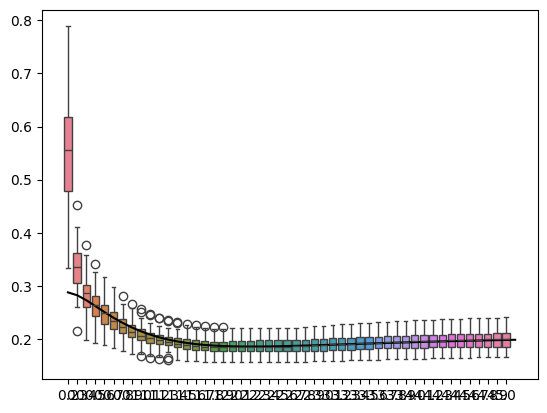

In [94]:
sns.boxplot(res_var_plug_in[:,1:]).set_xticklabels(np.round(delta[1:],1))
plt.plot(res, c='black')
plt.show()

/tmp/ipykernel_90627/61365166.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_nmr).set_xticklabels(np.round(delta,1))


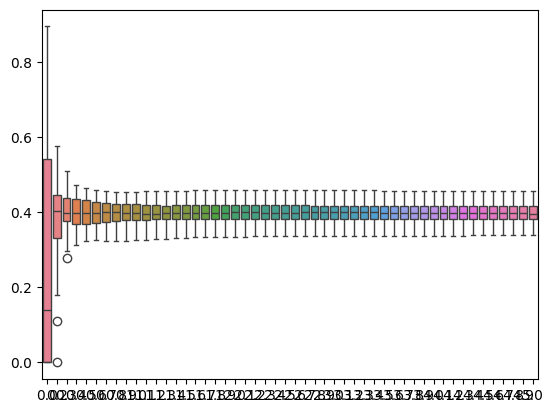

In [97]:
sns.boxplot(res_nmr).set_xticklabels(np.round(delta,1))
plt.show()

/tmp/ipykernel_90627/1878639219.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_ipr).set_xticklabels(np.round(delta,1))


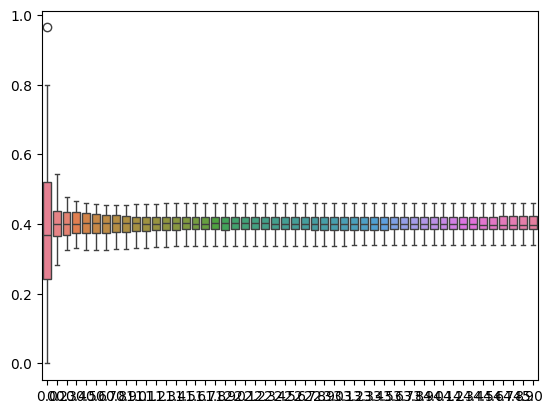

In [98]:
sns.boxplot(res_ipr).set_xticklabels(np.round(delta,1))
plt.show()

/tmp/ipykernel_90627/472636379.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_var_explicit).set_xticklabels(np.round(delta,1))
/tmp/ipykernel_90627/472636379.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(res_estim_nmr, color='gray').set_xticklabels(np.round(delta,1))


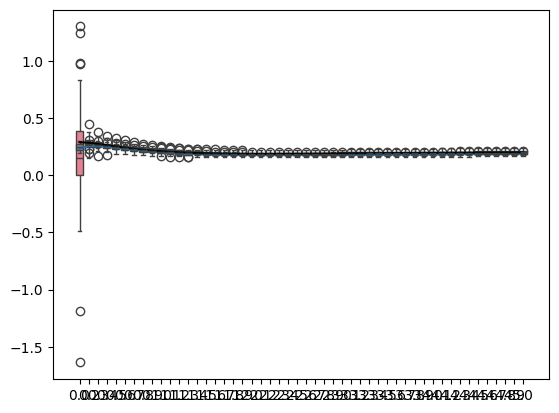

In [99]:
sns.boxplot(res_var_explicit).set_xticklabels(np.round(delta,1))
sns.boxplot(res_estim_nmr, color='gray').set_xticklabels(np.round(delta,1))
plt.plot(res_estim_nmr[0,:])
plt.plot(res, c='black')

In [100]:
c = 1.96

In [101]:
lower_ipr = res_ipr - c*np.sqrt(res_var_explicit)*np.sqrt(r)
upper_ipr = res_ipr + c*np.sqrt(res_var_explicit)*np.sqrt(r)

/tmp/ipykernel_90627/110157733.py:1: RuntimeWarning: invalid value encountered in sqrt
  lower_ipr = res_ipr - c*np.sqrt(res_var_explicit)*np.sqrt(r)
/tmp/ipykernel_90627/110157733.py:2: RuntimeWarning: invalid value encountered in sqrt
  upper_ipr = res_ipr + c*np.sqrt(res_var_explicit)*np.sqrt(r)


In [102]:
np.mean((0.4 > lower_ipr) & (0.4< upper_ipr), 0)

array([0.22, 0.86, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [103]:
lower_ipr = res_nmr - c*np.sqrt(res_var_plug_in)*np.sqrt(r)
upper_ipr = res_nmr + c*np.sqrt(res_var_plug_in)*np.sqrt(r)

In [104]:
np.mean((0.4 > lower_ipr) & (0.4< upper_ipr), 0)

array([0.92, 0.84, 0.94, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [105]:
from scipy.linalg import toeplitz

In [ ]:
def AR1(n, rho):
    """Generate AR(1) covariance matrix with parameter rho and size n x n."""
    return toeplitz(rho**np.arange(n))

In [107]:
ar1_cov(5, 0.5)

array([[1.    , 0.5   , 0.25  , 0.125 , 0.0625],
       [0.5   , 1.    , 0.5   , 0.25  , 0.125 ],
       [0.25  , 0.5   , 1.    , 0.5   , 0.25  ],
       [0.125 , 0.25  , 0.5   , 1.    , 0.5   ],
       [0.0625, 0.125 , 0.25  , 0.5   , 1.    ]])